# CNN 

convolution Neural Network - 이미지나 데이터를 처리할 때 전처리 하는 네트워크 모델(이미지 분류, 객체 탐지 등 사용됨)

CNN 구조
- convolution layer 이미지 특징 추출하는 역할, 필터를 사용해 이미지에서 중요한 패턴을 찾아냄
- ReLU layer 비선형성을 추가하는 활성화 함수, CNN이 더 복잡한 패턴을 학습할 수 있도록 함
- Pooling Layer 공간의 크기를 줄여 계산량을 줄이면서 중요한 정보만 남기게 함 , max pooling 사용
- Fully connected Layer 최종적으로 추출된 특징을 기반으로 이미지의 분류 수행 


딥러닝 CNN을 통한 classification

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/Administrator/dataset/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [7]:
# One-hot encoding for the 'Sex' column
df_encoded = pd.get_dummies(df, columns=['Sex'])

# Display the first few rows after encoding
df_encoded.head()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [8]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [13]:
X=df_encoded.drop('Rings',axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [14]:
y=df['Rings']
y.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Normalize the data (CNN and LSTM models often perform better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# CNN expects 2D data, we can treat each feature as a channel (reshape to (samples, features, 1))
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [18]:
X_train_cnn.shape, X_test_cnn.shape

((3341, 10, 1), (836, 10, 1))

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Build CNN model
cnn_model = Sequential()

# Add Convolutional layers
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten the output and add Dense layers
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1))  # Regression output layer for predicting 'Rings'

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model summary
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)             │ (None, 8, 32)         │          128 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling1d_4               │ (None, 4, 32)         │            0 │
│ (MaxPooling1D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv1d_5 (Conv1D)             │ (None, 2, 64)         │        6,208 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling1d_5               │ (None, 1, 64)         │            0 │
│ (MaxPooling1D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_2 (Flatten)           │ (None, 64)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_4 (Dense)               │ (None, 128)           │        8,320 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_2 (Dropout)           │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_5 (Dense)               │ (None, 1)             │          129 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 14,785 (57.75 KB)

 Trainable params: 14,785 (57.75 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# 모델 학습 
model_history = cnn_model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 62.5777 - mae: 6.6782 - val_loss: 9.7279 - val_mae: 2.2243
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 12.7434 - mae: 2.5777 - val_loss: 7.1303 - val_mae: 1.8338
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.3128 - mae: 2.1237 - val_loss: 5.8573 - val_mae: 1.7037
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.0111 - mae: 2.0048 - val_loss: 5.7118 - val_mae: 1.6246
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.0890 - mae: 1.9584 - val_loss: 5.3608 - val_mae: 1.5796
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.1447 - mae: 1.9416 - val_loss: 5.0820 - val_mae: 1.6001
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.2954 - mae: 1.8308 - val_loss: 5.0396 - val_mae: 1.5682
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.7364 - mae: 1.9141 - val_loss: 4.9852 - val_mae: 1.5727
Epoch 9/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

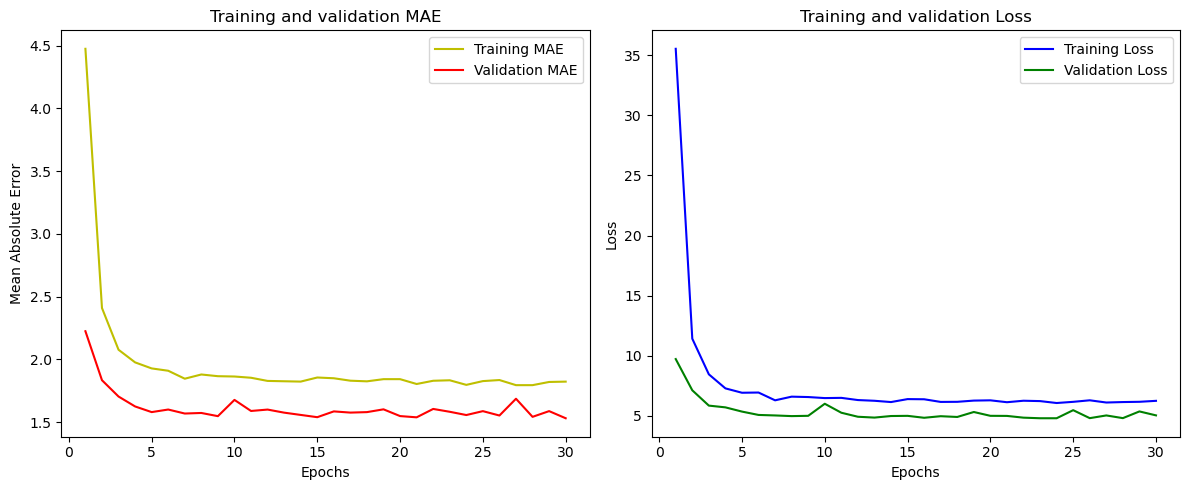

In [30]:
# MAE 그래프
mae = model_history.history['mae']
val_mae = model_history.history['val_mae']
epochs = range(1, len(mae) + 1)  # epochs 범위 설정

# 손실 그래프
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure(figsize=(12, 5))

# MAE 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, mae, 'y', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
# 모델을 사용하여 예측 수행
y_pred = cnn_model.predict(X_test_scaled)

# 예측값이 회귀 문제라면 y_pred를 그대로 사용합니다.
# 예측값을 평가합니다.
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Mean Squared Error: 5.045620076083475
Mean Absolute Error: 1.530621493261967
R^2 Score: 0.5339009538984336
